In this notebook we are going to focus on features which will be derived from time domain characteristics.

In [1]:
import numpy as np
import math
from scipy.signal import argrelextrema, find_peaks

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/TV/absent"

In [3]:
waves = np.load(path + "/absent_TV_waves_10sec.npy", allow_pickle= True)

In [4]:
waves.shape

(5718, 40000)

## Mean:

In [5]:
mean_ = np.zeros(waves.shape[0])

In [6]:
for i in range(waves.shape[0]):
    mean_[i] = waves[i].mean()

## Standart deviation:

In [7]:
std_ = np.zeros(waves.shape[0])
for i in range(waves.shape[0]):
    std_[i] = waves[i].std()

## Skewness

In [8]:
from scipy.stats import skew

In [9]:
skew_ = np.zeros(waves.shape[0])
for i in range(waves.shape[0]):
    skew_[i] = skew(waves[i])

## Kurtosis

In [10]:
import scipy.stats

In [11]:
kurt_ = np.zeros(waves.shape[0])
for i in range(waves.shape[0]):
    kurt_[i] =  scipy.stats.kurtosis(waves[i])

## Harmonic Mean

In [12]:
harmonic_ = np.zeros(waves.shape[0])
for i in range(waves.shape[0]):
    harmonic_[i] =  scipy.stats.hmean(waves[i]* waves[i])

## Autocorrelation

In [13]:
from scipy import signal
from scipy.signal import find_peaks

In [14]:
autocorr = signal.fftconvolve(waves[0], waves[0], mode='full')

/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_2688/835141848.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


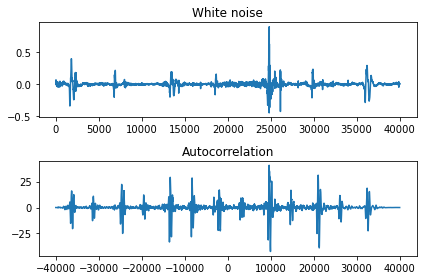

In [15]:
import matplotlib.pyplot as plt
>>> fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
>>> ax_orig.plot(waves[0])
>>> ax_orig.set_title('White noise')
>>> ax_mag.plot(np.arange(-len(waves[0])+1,len(waves[0])), autocorr)
>>> ax_mag.set_title('Autocorrelation')
>>> fig.tight_layout()
>>> fig.show()

In [16]:
peaks = find_peaks(autocorr, height = 10)

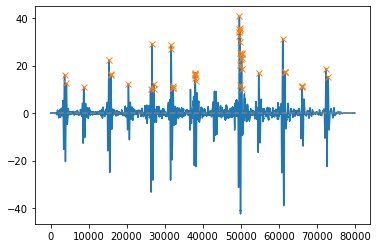

In [17]:
>>> plt.plot(autocorr)
>>> plt.plot(peaks[0], autocorr[peaks[0]], "x")
>>> plt.plot(np.zeros_like(autocorr), "--", color="gray")
>>> plt.show()

In [18]:
autocorr = signal.fftconvolve(waves[79], waves[79], mode='full')

/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_2688/759871826.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


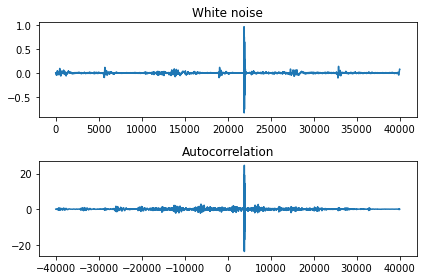

In [19]:
>>> fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
>>> ax_orig.plot(waves[79])
>>> ax_orig.set_title('White noise')
>>> ax_mag.plot(np.arange(-len(waves[79])+1,len(waves[79])), autocorr)
>>> ax_mag.set_title('Autocorrelation')
>>> fig.tight_layout()
>>> fig.show()

peaks = find_peaks(autocorr, height = 10)



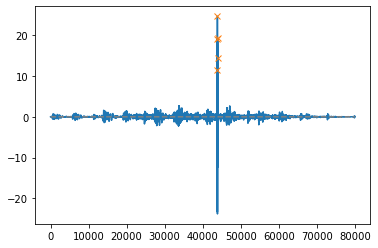

In [20]:
>>> plt.plot(autocorr)
>>> plt.plot(peaks[0], autocorr[peaks[0]], "x")
>>> plt.plot(np.zeros_like(autocorr), "--", color="gray")
>>> plt.show()

In [21]:
peaks[0].mean()

43859.4

In [22]:
auto_corr = np.zeros((waves.shape[0], 79999))
peaks_ = []
for i in range(waves.shape[0]):
    auto_corr[i,:] = signal.fftconvolve(waves[i], waves[i], mode='full')
    peaks_.append(find_peaks(auto_corr[i], height = 0)[1]["peak_heights"].mean())
    

In [23]:
peaks_ = np.array(peaks_)
peaks_.shape

(5718,)

# Now lets create their dataframes

In [24]:
import pandas as pd

In [25]:
mean_df = pd.DataFrame(mean_, columns =["mean"])
mean_df.head()

mean
0 -0.001202
1 -0.001366
2 -0.001523
3  0.000346
4 -0.000449

In [26]:
std_df = pd.DataFrame(std_, columns =["std"])
std_df.head()

std
0  0.054337
1  0.061913
2  0.057716
3  0.058431
4  0.040459

In [27]:
kurtosis_df = pd.DataFrame(kurt_, columns = ["kurtosis"])
kurtosis_df.head()

kurtosis
0  34.293339
1  19.674217
2  17.625926
3  31.458879
4  16.253649

In [28]:
skew_df = pd.DataFrame(skew_, columns =["skewness"])
skew_df.head()

skewness
0  1.903305
1  1.383454
2  1.034603
3  0.900475
4  0.274130

In [29]:
harmonic_df = pd.DataFrame(harmonic_, columns =["harmonic mean"])
harmonic_df.head()

harmonic mean
0   5.591674e-09
1   2.147751e-09
2   5.107992e-09
3   7.695238e-09
4   2.412872e-09

In [30]:
autocorr_peaks_df = pd.DataFrame(peaks_, columns =["ac peak height mean"])
autocorr_peaks_df.head()

ac peak height mean
0             2.009169
1             2.480882
2             2.191001
3             2.210221
4             0.993367

## Now concatenate all features

In [31]:
df = pd.concat([mean_df, std_df, skew_df, kurtosis_df, harmonic_df, autocorr_peaks_df], axis =1)

In [32]:
df

mean       std  skewness    kurtosis  harmonic mean  \
0    -0.001202  0.054337  1.903305   34.293339   5.591674e-09   
1    -0.001366  0.061913  1.383454   19.674217   2.147751e-09   
2    -0.001523  0.057716  1.034603   17.625926   5.107992e-09   
3     0.000346  0.058431  0.900475   31.458879   7.695238e-09   
4    -0.000449  0.040459  0.274130   16.253649   2.412872e-09   
...        ...       ...       ...         ...            ...   
5713 -0.000565  0.034283 -5.925952  466.578310   8.617271e-10   
5714 -0.000562  0.016516 -0.020414   12.963286   7.752978e-10   
5715  0.000383  0.016984  0.476136   13.448791   1.940498e-09   
5716 -0.000319  0.023842 -8.311322  408.576731   9.476809e-09   
5717 -0.000202  0.044267  0.015505   91.597607   0.000000e+00   

      ac peak height mean  
0                2.009169  
1                2.480882  
2                2.191001  
3                2.210221  
4                0.993367  
...                   ...  
5713             0.272621  
5714             0.235160  
5715             0.197420  
5716             0.197919  
5717             0.587601  

[5718 rows x 6 columns]

In [33]:
df.to_csv("/Users/ecem/Desktop/phonocardiogram/data/TV/absent/TV-statistical-features.csv" )